# Generalización, Overfitting, Underfitting y Regularización

En esta clase estudiaremos como determinar que un modelo de Redes neuronales ha aprendido, para esto introduciremos el cncepto de validación. Evaluaremos la relación en tre bias y varainza del modelo y como esta s epuede observar a medida que entrenamos la red.

## Sets de entrenamiento, validación y prueba

El objetivo del entrenamiento de la red neuronal es qu eella sea capaz de *Generalizar*. Generalizar se reifere a tener la capaciada de extraer la información de la estructura interna de los datos, de tal forma qu eal evaluar datos nuevos, que la red no ha observado, esta sea capaz de producir una salida adecuada. 

Debido a que la red tiene diferente tipos de hiper-parámetros, los cuales deberían sintonizarse (tune) durante el entrenamiento, no es adecuado utilizar los datos de prueba para realizar esta tarea.  DEbido a que en cierta forma los datos de prueba perderian su objetivo, el cual es probar el rendimiento de la red sin haber sido utilizados durante ninguna parte del entrenamiento. Por está razón surge la necesidad de utilizar un nuevo conjunto de datos, denominado **set de validación**. Este conjunto de validación nos permitíra escoger que valores de hyper-parámetros tiene el mejor rendimiento en la validación. debido a esta retroalimentación, cierta información sobre la estructura de los datos de validación se filtra en los parámetros de la red, esto puede producir que se genere overfitting en el conjunto de validación. Una estrategia para evitar esto es utilizar validación cruzada, la cual estudiaremos más adelante.

Un esquema de la segmentación de datos para entrenamiento, validación y prueba se puede observar en la siguiente figura:

<img src="image/image_24.jpg">

Una vez se han encpntrado los mejores hiper-parámetros, estos se dejan fijos y se entrena el modelo (encuentra el valor de los pesos $\mathbf{W}$ utilizando todos los datos de entrenamiento y validación. Luego el modelo se prueba utilizando los datos de prueba.

El problema de esta metodologia surge cuando se tienen pocos datos. En ese caso se utilizan muy pocos datos par aentrenar y muy pocos para validar, lo cual ocaciona que las muestras de validación no tengan el poder estadistico suficiente para evaluar correctamente el modelo. En esos casos validación cruzada es mejor.

## Ejemplo con Mnist dataset

En este ejemplo utilizaremos validación para entrenar el modelo para el problema de reconocimiento de digitos:

In [9]:
from keras.datasets import mnist
# Dividimos los datos en entrenamiento y pureba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Cantidad de datos
print('El tamaño de los datos de entrenamiento es:', train_images.shape)
print('El tamaño de los labels de entrenamiento es:', train_labels.shape)
print('El tamaño de los datos de prueba es:', test_images.shape)
print('El tamaño de los labels de prueba es:', test_labels.shape)

El tamaño de los datos de entrenamiento es: (60000, 28, 28)
El tamaño de los labels de entrenamiento es: (60000,)
El tamaño de los datos de prueba es: (10000, 28, 28)
El tamaño de los labels de prueba es: (10000,)


In [10]:
import numpy as np

# Selecionar muestras aleatorias como training y validacion
num_validation_samples = 18000
training_samples = [x for x in range(60000)]
np.random.shuffle(training_samples)
training_samples
validation_set = training_samples[0:num_validation_samples] 
training_set = training_samples[num_validation_samples:] 

train_set = train_images[training_set,:,:]
train_target = train_labels[training_set]
Validation_set = train_images[validation_set,:,:]
validation_target = train_labels[validation_set]

len(validation_set)

18000

In [11]:
# Inicializando los parametros de la red neuronal

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(300, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='sigmoid'))
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
train_imag = train_set.reshape((42000,28*28))
train_imag = train_imag.astype('float32')/255

val_imag = Validation_set.reshape((18000,28*28))
val_imag = val_imag.astype('float32')/255

test_imag = test_images.reshape((10000,28*28))
test_imag = test_imag.astype('float32')/255

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_target)
val_labels = to_categorical(validation_target)
test_labels = to_categorical(test_labels)

In [19]:
history = network.fit(train_imag, train_labels, validation_data=(val_imag,val_labels), epochs=10, batch_size = 128)

Epoch 1/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0153 - accuracy: 0.9977 - val_loss: 0.0838 - val_accuracy: 0.9754
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0845 - val_accuracy: 0.9758
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0130 - accuracy: 0.9982 - val_loss: 0.0823 - val_accuracy: 0.9763
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0117 - accuracy: 0.9985 - val_loss: 0.0825 - val_accuracy: 0.9761
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0107 - accuracy: 0.9988 - val_loss: 0.0823 - val_accuracy: 0.9758
Epoch 6/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0098 - accuracy: 0.9989 - val_loss: 0.0855 - val_accuracy: 0.9758
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0089 - accuracy: 0.9991 - val_loss: 0.0829 - val_accuracy: 0.9767
Epoch 

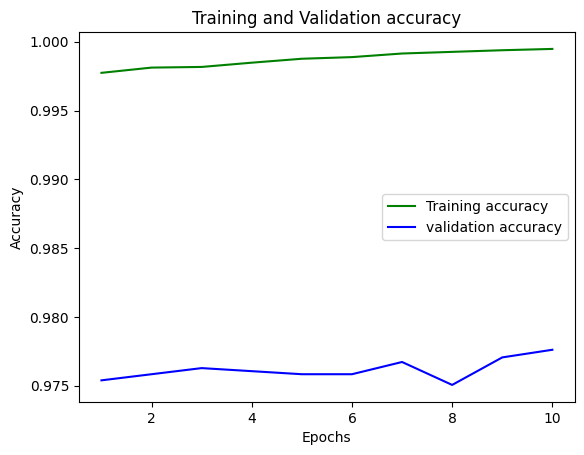

In [20]:
import matplotlib.pyplot as plt

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

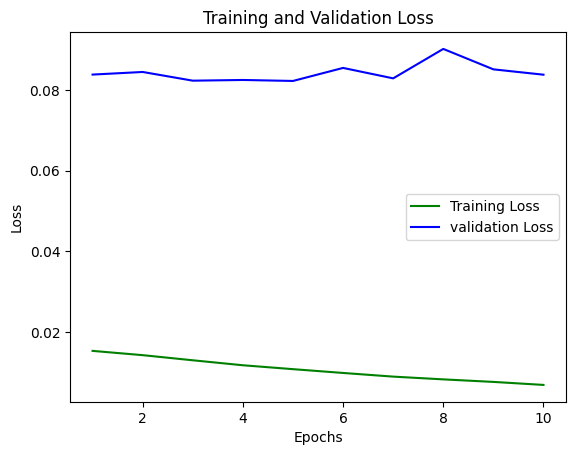

In [22]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
test_loss, test_acc = network.evaluate(test_imag, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9796
test_acc: 0.9796000123023987


## Overfitting, Underfitting, bias and Variance


Cuando entrenamos un modelo de red neuronal queremos que este sea capaz de generalizar, es decir que pueda extraer la información relevante que hay en los datos sin aprender información que no es relevante. Sin emabargo es dificil poder determinar cuando el modelo ha generalizado. Para entender un poco como lso datos de valdiación pueden ayudar en este proceso vamos a definir dos términos importantes:

1. **Bias del Modelo:** indica que tan bien el modelo es capaz de ajustarse (predecir) los datos de entrenamiento. Un modelo con un bias alto es un modelo que no puede ajustarse bien a los datos.

2. **Varianza del modelo:** indica que tan bien el modelo es capaz de predecir datos en el set de validación (que no han sido vistos durante el entrenamiento). Modelo con alta varianza indica que el error de validación será alto. Un modelo con una varainza baja indica que el error de validación será bajo.

Basado en estas definiciones podemos decir que un modelo que no es capaz de ajustarse a los datos presenta **underffiting** (subajuste) el cual esta caracterizado por **alto bias, alta varianza**.

Por otro lado un modelo que esta **overfitting** presenta **bajo bias** y una **alta varianza**.

Cuando empezamos a entrenar un modelo, al inicio la capacidad de generalizar y el algortimo de optimización estan correlacionados, es decir entre mejor se ajuste el modelo a los datos de entrenamiento, mejor será la generalziación del modelo. Mientras esto sucede se dice que la red esta subajustada, porque aun puede aprender algo de la estructura de los datos. Pero luego de cierto numero de epocas el rendimiento de la red en validación s eempieza a degradar, a pesar de que el error en lso datos de entrenamiento sigue reduciendose, en este momento se dice qu ela red esta siendo sobre ajustada, es decir esta memorizandose los datos de entrenamiento, información qu eno es relevante, y por esto pierde poder de generalización. 

Una de las formas de evitar el sobreajuste es consiguiendo mas datos de entrada, así el modelo podra generalizar mejor. sin emabargo esto no es siempre posible. entonces se debe garantizar un balance entre los datos de entrenamiento disponibles y el numero de pesos en la red. En estos casos se tiende a escoger redes que sean mas pequeñas, que tengan una capacidad más pequeña para almacenar información.

### Capacidad de la Red

La capacidad de la red se refiere a la cantidad de información que la red puede almacenar. Redes con pocos pesos tienen una capacidad más limitada que redes con un mayor número de pesos. Al entrenar redes se pueden tener tres casos:

1. La capacidad de la red es menor a la información de la estructura interna de los datos. En estos casos la red tendera a proporcionar soluciones subajustadas.

2. La capacidad de la red es mucho mayor que la información de la estructura interna de los datos, en estos casos la red tendera a alamcenar la información presente en los datos de entrenamiento, memorizarlos, y debido a esto pierde capacidad de generalizar. En estos casos se dice qu ela red esta siendo sobreajustada.

3. La capacidad de la red es cercana a la información contenida en los datos. En estos casos la complejidad del modelo es adecuada para el objetivo que se busca.

Comparando redes de mayor y menor capacidad, las de mayor capacidad empiezan a generar overfitting primero (en epocas mas tempranas) que las de menor complejidad. Para observar overfitting podemos observar cuando el error de validación que estaba disminuyendo, empieza a aumentar, mientras que el error de entrenamiento sigue disminuyendo.

## Regularizar

Otra forma de reducir las posibilidades de overfitting es ustilizar regularización de los pesos. Esta regularización puede ser de la forma $l_1$ (tipo LASSO) o $l_2$ (tipo Ridge), entre otras. Algunas veces seutiliza tanto $l_1$ como $l_2$, esta combinación se le conoce como *elastic net regularization*.  Para regularizar en keras se define el parametro *kernel_regularizer_l2* o *kernel_regularizer_l1* o *kernel_regularizer_l1_l2* y se define la constante de regularización.

In [28]:
from keras import regularizers

network2 = models.Sequential()
network2.add(layers.Dense(300, kernel_regularizer=regularizers.l2(0.0001), activation='sigmoid', input_shape=(28*28,)))
network2.add(layers.Dense(10,activation='sigmoid'))
network2.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
               metrics=['accuracy'])


Epoch 1/10
329/329 [==============================] - 3s 6ms/step - loss: 0.6093 - accuracy: 0.8606 - val_loss: 0.4057 - val_accuracy: 0.9016
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3541 - accuracy: 0.9137 - val_loss: 0.3553 - val_accuracy: 0.9139
Epoch 3/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3114 - accuracy: 0.9253 - val_loss: 0.3302 - val_accuracy: 0.9207
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2809 - accuracy: 0.9351 - val_loss: 0.3160 - val_accuracy: 0.9242
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2569 - accuracy: 0.9420 - val_loss: 0.2731 - val_accuracy: 0.9373
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2382 - accuracy: 0.9469 - val_loss: 0.2646 - val_accuracy: 0.9398
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2216 - accuracy: 0.9509 - val_loss: 0.2469 - val_accuracy: 0.9452
Epoch 

In [ ]:
history = network2.fit(train_imag, train_labels, validation_data=(val_imag,val_labels), epochs=10, batch_size = 128)

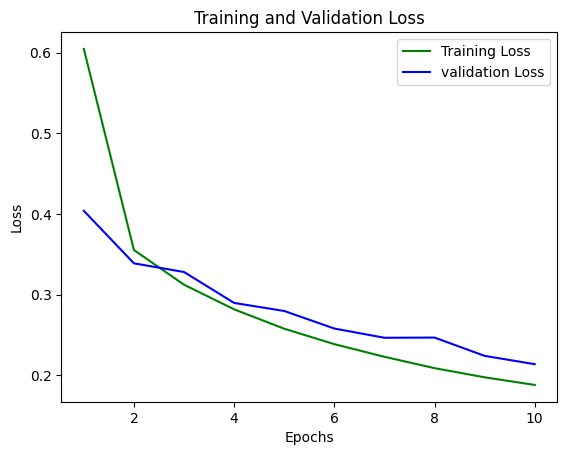

In [27]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [133]:
test_loss, test_acc = network.evaluate(test_imag, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.9521
test_acc: 0.9520999789237976


## En resumen como manejar el bias y la varianza en las redes

Para evitar el overfitting se pueden usar las siguientes estrategias:

1. **Reentrenar:** Entrenar varias veces una red y escoger la que presente el mejor rendimiento (dentro de lo permitido). Esta red será la que mayor probabilidad de generalizar hay aobtenido. (No es la opción más intuitiva)

2. **Analizar muchas arquitecturas:** Para poder seleccionar una red que sea capaz de generalizar de forma adecuada se deben entrenar diferentes arquitecturas de red, y luego evaluar el desempeño de cada una de ellas.

3. **Parada temprana:** Se puede parar de forma temprana el entrenamiento, cuando se observa que el error de validacion ha aumentado y el error de entrenamiento sigue disminuyendo. O tambien se puede parar el entrenamiento si el error de validación nunca decrece.

4. **Regularizar:** Utilizar regularización ayuda a prevenir el overfitting.

Por otro lado para reducir la probabilidad de underfitting se pueden seguir las siguientes estrategias:

1. **Incrementar la complejidad de la Red:** Auemantar el numero de capas, el número de neuronas o la dimension de los datos de entrada. Esto aumenta la capaciada de la red y evita que entre en underfitting.

2. **Datos de entrenamiento:** Se pueden agregar más datos de entrenamiento, o mejorar la calidad de los datos que se tienen. De esta forma la red puede aprender la estructura de los datos de una forma más sencilla (menor complejidad).

3. **Reducir la Regularización:** Reducir la constante de regularización hace que el peso en la función de costo sea mayor al ajuste de los datos, que a la información proporcionada por la magnitud de los pesos.

Para poder entrenar una red neuronal y escoger unbuen modelo, debemos tener un pipeline bien identificado y ser muy organizados con los resultados que pobtenemos de cada uno de los modelos. Ya sea que se utilicen diferentes computadores, servidores, o recursos de la nube para entrenar o para almacenar datos de entrenamiento.